In [1]:
import pandas as pd
import glob
import numpy as np
import os
%matplotlib inline

In [2]:
csv_path = r'D:\Projects\RO\DataChallenge2018\P_station\2.3 neerslag'
csv_ins = glob.glob('{}//*.csv'.format(csv_path))

In [3]:
# csv_ins = [csv_ins[0], csv_ins[-1]]
# csv_ins

In [4]:
all_pv = np.array([251,256,203,202,225,216,339,342,333,334,273,200])

In [5]:
df_all = pd.DataFrame()

In [7]:
for csv_in in csv_ins:

    # find peilvak selection in csv
    pv_start = int(os.path.basename(csv_in)[3:6])
    pv_end = int(os.path.basename(csv_in)[10:13])
    print(pv_start, pv_end)
    select_pv = ['LHA{}'.format(x) for x in all_pv[(all_pv >= pv_start) & (all_pv <= pv_end)]]
    
    # read csv
    df = pd.read_csv(csv_in, skiprows=2)#, index_col=[0,1,2])#, dtype=np.float64)
    df.index = pd.to_datetime(df['Eind'], dayfirst=True)
    df_sel = df[select_pv]
    df_sel = df_sel.resample('H').sum()
    
    df_all = pd.concat((df_all, df_sel))

200 230
200 230
200 230
200 230
200 230
200 230
200 230
200 230
231 260
231 260
231 260
231 260
231 260
231 260
231 260
231 260
261 316
261 316
261 316
261 316
261 316
261 316
261 316
261 316
317 346
317 346
317 346
317 346
317 346
317 346
317 346
317 346


In [11]:
df_all.index.name = 'datetime'

In [12]:
df_all.to_csv(r'D:\Projects\RO\0815.10 Data Challenge 2018\Neerslag//neerslag_mm_hr.csv')

In [41]:
df_precip = df_all.groupby(pd.TimeGrouper('H')).sum()

c:\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


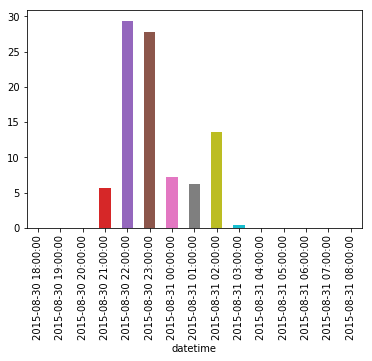

In [43]:
%matplotlib inline
df_precip['2015-08-30 18:00':'2015-08-31 08:00']['LHA251'].plot(kind='bar')

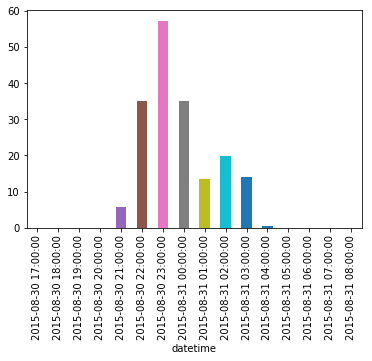

In [78]:
df_2H = df_precip.rolling(window = '2H').sum()#.shift(1)
df_2H['2015-08-30 17:00':'2015-08-31 08:00']['LHA251'].plot(kind='bar')

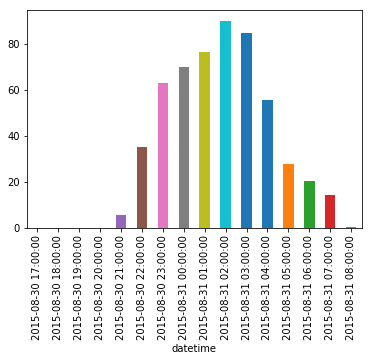

In [84]:
df_6H = df_precip.rolling(window = '6H').sum()#.shift(-6)
df_6H['2015-08-30 17:00':'2015-08-31 08:00']['LHA251'].plot(kind='bar')

# df_2H = df_precip.resample('2H', closed='right').sum().shift(1)
# df_2H['2015-08-30 17:00':'2015-08-31 08:00']['LHA251'].plot(kind='bar')

In [86]:
df_6H.shape

(70129, 12)

In [87]:
df_2H.shape

(70129, 12)

In [88]:
df_precip.shape

(70129, 12)

In [89]:
df_precip.head()

,LHA200,LHA202,LHA203,LHA216,LHA225,LHA251,LHA256,LHA273,LHA333,LHA334,LHA339,LHA342
datetime,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df_2H.head()

,LHA200,LHA202,LHA203,LHA216,LHA225,LHA251,LHA256,LHA273,LHA333,LHA334,LHA339,LHA342
datetime,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
